<a href="https://colab.research.google.com/github/Michafolab/alx-interview/blob/main/coffee_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd

mount_point = '/content/drive'

if not os.path.exists(mount_point):
  os.makedirs(mount_point)

drive.mount(mount_point)

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))

# Construct the file path
file_path = '/content/' + filename
print(file_path)


Saving coffeee.xlsx to coffeee.xlsx
/content/coffeee.xlsx


In [ ]:
import pandas as pd

pd.set_option('display.width', 1000)

# sheet_name ='CLR06.04.2024'
sheet_name = 'pop-income'
sheet_name1 = 'con_mth'
sheet_name2 = 'mth_supp'
sheet_name3 = 'year_supp'


df = pd.read_excel(file_path, sheet_name=sheet_name)

# print(df.shape)
pd.options.display.float_format = '{:,.2f}'.format
print(df.head())

  COUNTRY_CODE EDITED    COUNTRY_NAME OFFICIAL LANG CODE  AVERAGE POPULATION GROWTH  AVG CONSUMPTION         INCOME GROUP
0                 CHN           China                 EN           1,409,228,000.00         2,054.64  Upper middle income
1                 IND           India                 EN           1,394,647,899.60           963.31  Lower middle income
2                 EUU  European Union                  O             447,321,845.60        42,320.95              No data
3                 USA   United States                 EN             330,399,755.00         8,318.80          High income
4                 IDN       Indonesia                 EN             271,552,444.20         1,756.30  Upper middle income


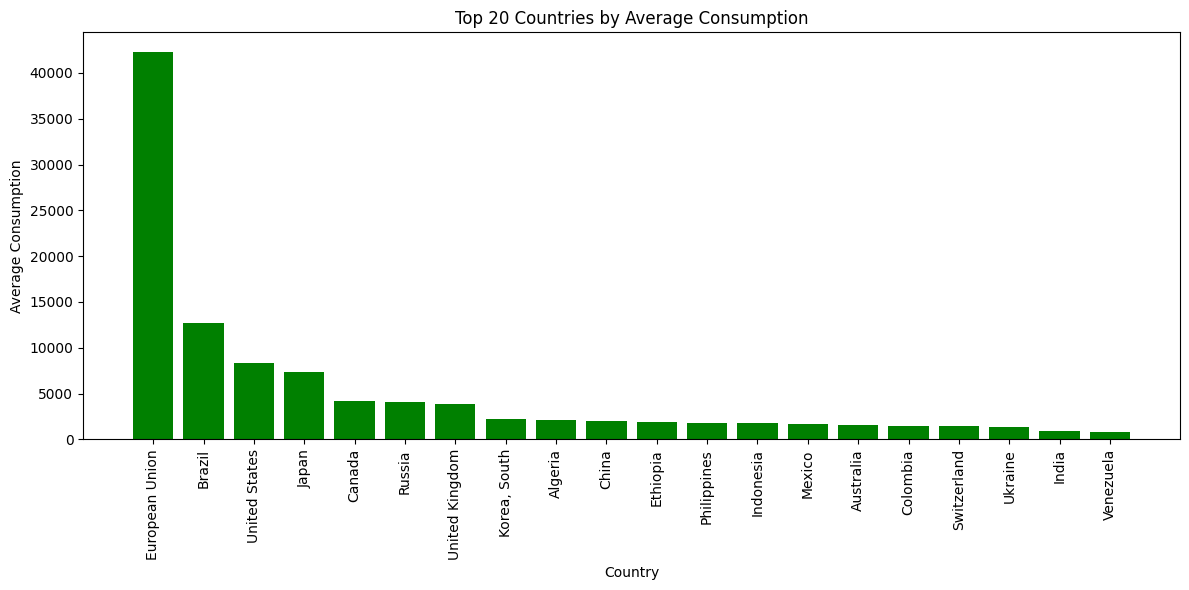

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Data preparation
# Convert all values in 'AVERAGE POPULATION GROWTH' to strings, replace commas, and then convert to float
df['AVERAGE POPULATION GROWTH'] = df['AVERAGE POPULATION GROWTH'].astype(str).str.replace(',', '').astype(float)
# Convert all values in 'AVG CONSUMPTION' to floats
df['AVG CONSUMPTION'] = df['AVG CONSUMPTION'].astype(float)

# Sort the dataframe by 'AVERAGE POPULATION GROWTH' and 'AVG CONSUMPTION' and select the top 20
top_population = df.nlargest(20, 'AVERAGE POPULATION GROWTH')
top_consumption = df.nlargest(20, 'AVG CONSUMPTION')


# Plotting Average Consumption by Top 20 Countries
plt.figure(figsize=(12, 6))
plt.bar(top_consumption['COUNTRY_NAME'], top_consumption['AVG CONSUMPTION'], color='green')
plt.xlabel('Country')
plt.ylabel('Average Consumption')
plt.title('Top 20 Countries by Average Consumption')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


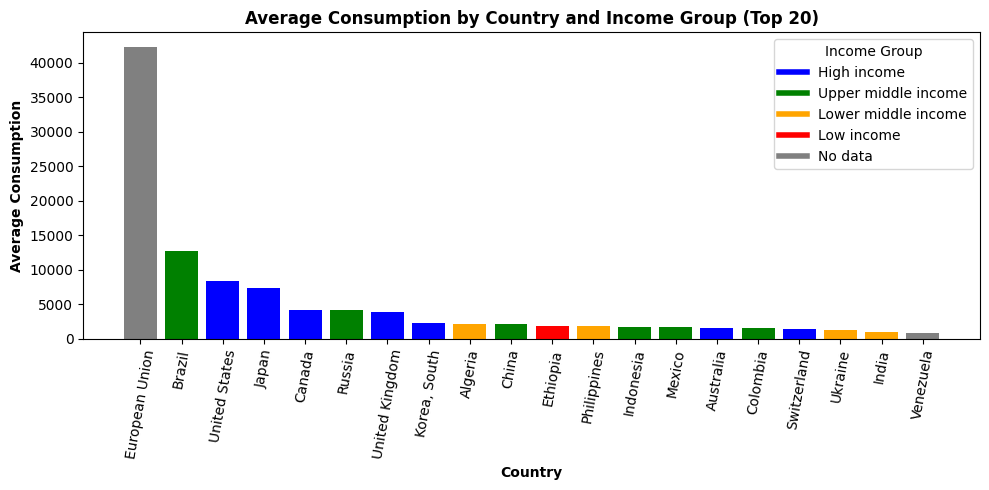

In [ ]:
pd.set_option('display.width', 1000)

# sheet_name ='CLR06.04.2024'
sheet_name = 'pop-income'
sheet_name1 = 'con_mth'
sheet_name2 = 'mth_supp'
sheet_name3 = 'year_supp'


df = pd.read_excel(file_path, sheet_name=sheet_name)

# Sort data by average consumption in descending order
df_sorted = df.sort_values(by='AVG CONSUMPTION', ascending=False).head(20)


# Sort data by average consumption in descending order
df_sorted = df.sort_values(by='AVG CONSUMPTION', ascending=False).head(20)

# Plotting bar chart
plt.figure(figsize=(10, 5))

# Define colors for different income groups
income_group_colors = {
    'High income': 'blue',
    'Upper middle income': 'green',
    'Lower middle income': 'orange',
    'Low income': 'red',
    'No data': 'grey'
}

# Bar chart for average consumption by country
bars = plt.bar(df_sorted['COUNTRY_NAME'], df_sorted['AVG CONSUMPTION'], color=[income_group_colors.get(income, 'black') for income in df_sorted['INCOME GROUP']])

# Adding labels and title
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Average Consumption', fontweight='bold')
plt.title('Average Consumption by Country and Income Group (Top 20)', fontweight='bold')
plt.xticks(rotation=80)

# Adding a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in income_group_colors.values()]
labels = income_group_colors.keys()
plt.legend(handles, labels, title='Income Group')

plt.tight_layout()
plt.show()



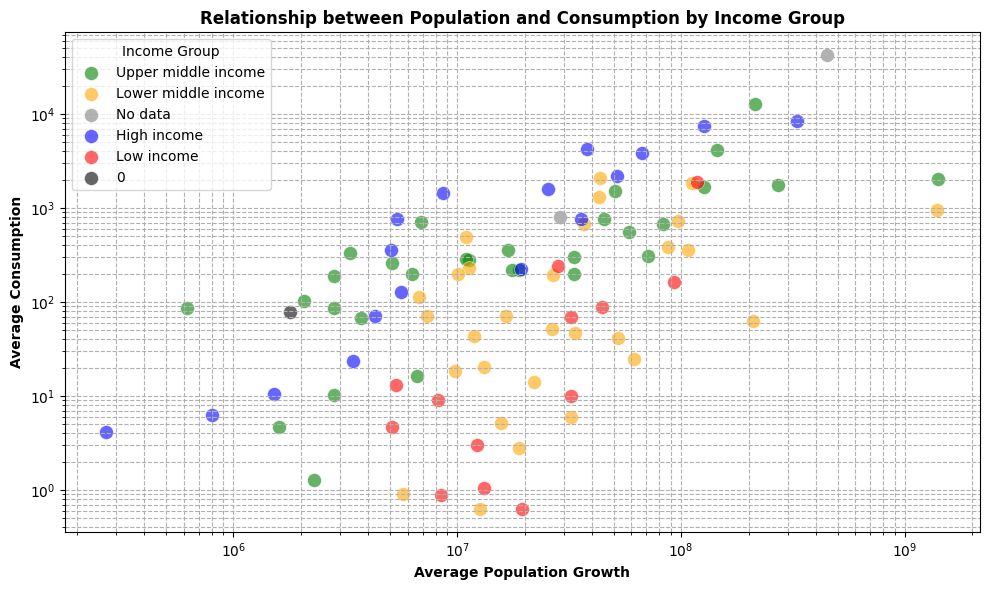

In [ ]:
df = pd.read_excel(file_path, sheet_name=sheet_name)

# print(df.shape)
pd.options.display.float_format = '{:,.2f}'.format


# Plotting
plt.figure(figsize=(10, 6))

# Define colors for different income groups
income_group_colors = {
    'High income': 'blue',
    'Upper middle income': 'green',
    'Lower middle income': 'orange',
    'Low income': 'red',
    'No data': 'grey'
}

# Scatter plot for population vs. consumption
for income_group in df['INCOME GROUP'].unique():
    subset = df[df['INCOME GROUP'] == income_group]
    plt.scatter(subset['AVERAGE POPULATION GROWTH'], subset['AVG CONSUMPTION'],
                label=income_group, color=income_group_colors.get(income_group, 'black'), s=100, alpha=0.6, edgecolors='w', linewidth=0.5)

# Adding labels and title
plt.xlabel('Average Population Growth', fontweight='bold')
plt.ylabel('Average Consumption', fontweight='bold')
plt.title('Relationship between Population and Consumption by Income Group', fontweight='bold')
plt.legend(title='Income Group')
plt.xscale('log')  # Using logarithmic scale for better visualization
plt.yscale('log')  # Using logarithmic scale for better visualization
plt.grid(True, which="both", ls="--")

plt.tight_layout()
plt.show()

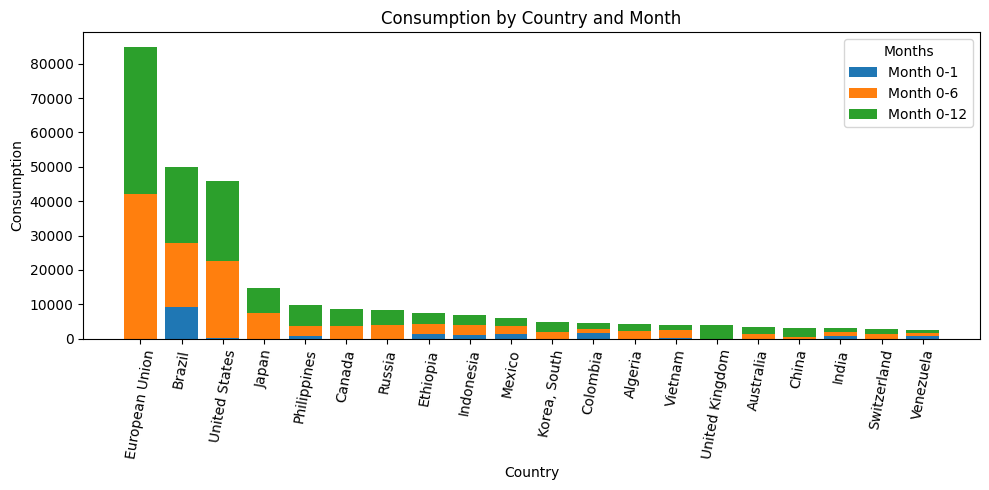

In [ ]:
df = pd.read_excel(file_path, sheet_name=sheet_name1)
df.head()

# Convert consumption columns to float
columns_to_convert = ['AVG  MONTH  0 TO 1', 'AVG  6 MONTHS', 'AVG  12 MONTHS', 'AVG GRAND TOTAL  CONSUMPTION']
df[columns_to_convert] = df[columns_to_convert].replace(',', '', regex=True).astype(float)

# Rename columns for easier access
df = df.rename(columns={
    'AVG  MONTH  0 TO 1': 'Month 0-1',
    'AVG  6 MONTHS': 'Month 0-6',
    'AVG  12 MONTHS': 'Month 0-12',
    'AVG GRAND TOTAL  CONSUMPTION': 'Grand Total'
})

df_top20 = df.head(20)

# Plotting
plt.figure(figsize=(10, 5))

# Plot stacked bar chart
countries = df_top20['COUNTRY_NAME']
month_0_1 = df_top20['Month 0-1']
month_6 = df_top20['Month 0-6']
month_12 = df_top20['Month 0-12']

bar1 = plt.bar(countries, month_0_1, label='Month 0-1')
bar2 = plt.bar(countries, month_6, bottom=month_0_1, label='Month 0-6')
bar3 = plt.bar(countries, month_12, bottom=month_0_1 + month_6, label='Month 0-12')

plt.xlabel('Country')
plt.ylabel('Consumption')
plt.title('Consumption by Country and Month')
plt.xticks(rotation=80)
plt.legend(title='Months')
plt.tight_layout()
plt.show()